# generate dataset

In [2]:
from scripts.get_top_stocks import *


top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [3]:
# specify variables for dataset generation

start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5

In [4]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [5]:
def categorize_by_percentile(values,percentile_list):
    # Compute percentiles
    # percentiles = np.percentile(values, [20, 40, 60, 80])
    # percentiles = np.percentile(values, [33,66])
    percentiles = np.percentile(values, percentile_list)
    # percentiles = np.percentile(values, [10,90])
    
    # Define labels
    # labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
    labels = ['sell', 'hold', 'buy']

    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)

    # could potentially have issue where 
    
    return categories

In [6]:
def add_target_cols(df):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),[20,80])
        
        label_mapping = {
            'sell': 0, 
            'hold': 1, 
            'buy': 2, 
        }
        
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [8]:
df = add_target_cols(df)

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47447/1245077338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),[20,80])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47447/1245077338.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47447/124507

In [21]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-24 13:30:00-05:00,43.939999,44.119999,43.820000,43.849998,43.849998,476612,-0.002050,-0.202214,-0.283142,...,-0.407293,0.386376,1.695161,-1.246069,-3.132086,-1.09,-0.000913,MRVL,hold,1
1,2023-02-24 14:30:00-05:00,43.849998,44.110001,43.610001,43.810001,43.810001,935388,-0.000913,0.136930,0.324912,...,-0.228080,0.459174,1.582192,-1.113271,-3.000983,-1.09,0.002052,MRVL,hold,1
2,2023-02-24 15:30:00-05:00,43.799999,43.900002,43.610001,43.900002,43.900002,1433334,0.002052,0.165502,0.210217,...,-0.532108,0.973621,3.217119,-1.614057,-3.585627,-1.09,0.015819,MRVL,buy,2
3,2023-02-27 09:30:00-05:00,44.869999,44.947300,44.330002,44.599998,44.599998,1704195,0.015819,0.102280,0.086329,...,0.175398,-0.143031,-0.557909,0.712480,11.135647,0.31,-0.002020,MRVL,hold,1
4,2023-02-27 10:30:00-05:00,44.590000,44.682400,44.230000,44.509998,44.509998,796756,-0.002020,-0.238665,-0.362838,...,0.534789,-0.126089,-0.707997,0.927322,24.138963,0.31,0.001930,MRVL,hold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89826,2024-07-30 10:30:00-04:00,1635.814941,1642.135010,1625.339966,1625.339966,1625.339966,26546,-0.011166,-0.099085,-0.153710,...,1.825518,1.353462,0.800444,0.148710,-0.269898,0.68,-0.006986,MELI,sell,0
89827,2024-07-30 11:30:00-04:00,1630.319946,1630.319946,1612.050049,1614.025024,1614.025024,21182,-0.006986,-0.115323,-0.112387,...,0.843108,0.697470,0.514532,0.123373,-0.196063,0.68,0.001192,MELI,hold,1
89828,2024-07-30 12:30:00-04:00,1614.675049,1619.420044,1603.089966,1615.949951,1615.949951,17438,0.001192,-0.110597,-0.096945,...,1.881096,1.096536,0.670931,0.159651,-0.201792,0.68,-0.000703,MELI,hold,1
89829,2024-07-30 13:30:00-04:00,1615.000000,1618.599976,1613.295044,1614.814941,1614.814941,25327,-0.000703,0.081420,0.184473,...,2.517390,1.307891,0.742988,0.182862,-0.192048,0.68,-0.001559,MELI,hold,1


In [36]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
# print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
# print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0


# preprocess dataset

- set targets correctly (try 3 targets first)
    - plot the distribution pdf of the target values
      
- split train val test on time
    - within each split can shuffle
    - split directly on the df

- shortlist the target and features
** keep the df unchanged so dont need to run above code again

In [38]:
# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)

# train test split on index
train_size, val_size, test_size = 0.8, 0.1, 0.1
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((71864, 84), (8983, 84), (8984, 84))

In [39]:
train_df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-10 12:00:00+00:00,106.360001,106.639999,106.199997,106.269997,106.269997,1318353,-0.000658,-0.007519,0.045017,...,1.028772,0.136904,-0.029851,-0.186527,-0.638538,0.11,0.004600,RR.L,buy,2
1,2023-02-10 12:00:00+00:00,153.437500,153.699997,153.000000,153.085007,153.085007,210932,-0.003243,-0.317099,-0.373950,...,1.165333,0.300798,-0.237521,-0.690568,-1.679347,0.11,0.001730,MKS.L,hold,1
2,2023-02-10 12:00:00+00:00,1619.500000,1625.500000,1615.000000,1625.000000,1625.000000,38967,0.003390,-0.156986,-0.213034,...,29.033343,-0.033365,-1.200842,-4.101547,45.477088,0.11,0.001537,III.L,hold,1
3,2023-02-10 13:00:00+00:00,106.260002,106.980003,106.129997,106.760002,106.760002,859007,0.004600,-0.154064,-0.210965,...,11.923219,0.395658,-0.006902,-0.241713,-0.861859,0.11,0.005232,RR.L,buy,2
4,2023-02-10 13:00:00+00:00,153.250000,153.899994,153.149994,153.350006,153.350006,206337,0.001730,-0.142110,-0.011012,...,2.664017,0.520411,-0.240000,-0.754125,-1.849107,0.11,0.000326,MKS.L,hold,1


In [40]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
        'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
        'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
        'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
        'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
        'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
        'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
        'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
        'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
        'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
        'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
        'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
        'Momentum64', 'EMAVolumeDiff1

# training mtd 1 - using all features

In [42]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71864, 72) (71864,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [43]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [44]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [45]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [46]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71864, 72) (71864,)
[[    0 14324]
 [    1 42980]
 [    2 14560]]
(128940, 72) (128940,)
[[    0 42980]
 [    1 42980]
 [    2 42980]]


In [47]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 1730]
 [   1 5553]
 [   2 1700]]
(16659, 72) (16659,)
[[   0 5553]
 [   1 5553]
 [   2 5553]]


In [48]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [49]:
from scripts.train_predict import *

# standardise the values

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((128940, 72), (128940,), (16659, 72), (16659,), (8984, 72), (8984,))

In [50]:
X_train[100],y_train[100]

(array([ 1.67459449e+00,  3.53158939e+00,  4.93761233e-01,  7.18503352e-02,
        -3.20973971e-02, -3.76880982e-01,  3.28983156e-01,  5.00763030e-01,
         1.00550896e-01,  9.30826195e-01,  6.75711998e-01,  8.40075548e-01,
         1.41790811e+00, -1.67760240e-01,  2.12835681e-01,  5.42392604e-01,
        -7.57290910e-01, -1.47016272e+00,  6.42498999e-01,  6.36399743e-01,
         9.86251515e-01, -3.63376477e-01, -3.50987452e-01,  5.73366892e-01,
        -7.77600060e-01, -8.61095285e-01,  4.41276932e-01,  4.73795843e-01,
         5.91101047e-01, -4.41158436e-01, -5.14344619e-01,  5.90947507e-01,
        -4.83296087e-01, -3.42568227e-01,  1.07086018e-01,  2.00859988e-01,
         2.97053242e-01, -5.26210054e-01, -8.58519907e-01,  5.97283427e-01,
        -1.14514504e-01,  5.56475561e-01, -1.63732161e-01, -3.41572658e-01,
        -8.07806019e-02, -4.19802328e-01, -8.72798785e-01, -3.81683567e-01,
         4.32359680e-02,  1.71780882e-01, -1.51109067e-01, -2.10329126e-01,
        -1.5

In [51]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [52]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4784201
|████████████████████████████████████████| 1/1 [100%] in 1:23.6 (0.01/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.47842


accuracy: 45.21


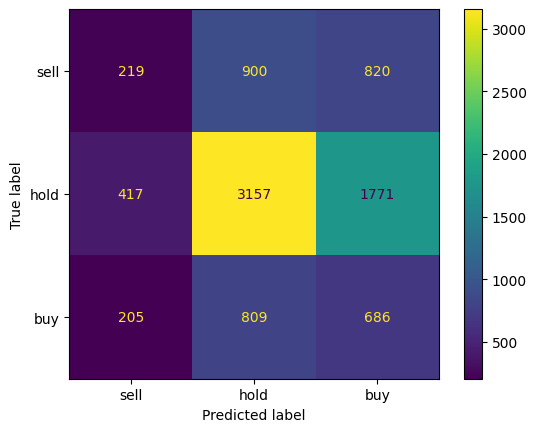

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [54]:
## predict on indiv stocks
## using all features

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()


    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

ABNB: 71.49
SNPS: 57.03
AMAT: 51.0
AVGO: 44.98
CRWD: 56.63
META: 62.25
WDAY: 66.27
AMZN: 57.83
PDD: 63.45
SMCI: 56.22
NVDA: 49.19
MSFT: 66.53
CDNS: 55.65
DDOG: 64.92
MRVL: 58.47
LRCX: 53.63
TTD: 60.08
DASH: 55.65
MELI: 63.31
BKNG: 65.32
CPRT: 57.66
MDB: 57.26
MU: 51.21
ZS: 61.29
INTU: 65.32
PANW: 57.26
MRNA: 57.26
ADBE: 58.87
AMD: 56.85
TSLA: 55.24
TEAM: 70.97
INTC: 60.48
RR.L: 63.87
MKS.L: 63.29
III.L: 54.91


# training mtd 2 - using SelectKBest(10)

In [56]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71864, 72) (71864,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [57]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [58]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [59]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [60]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71864, 72) (71864,)
[[    0 14324]
 [    1 42980]
 [    2 14560]]
(128940, 72) (128940,)
[[    0 42980]
 [    1 42980]
 [    2 42980]]


In [61]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 1730]
 [   1 5553]
 [   2 1700]]
(16659, 72) (16659,)
[[   0 5553]
 [   1 5553]
 [   2 5553]]


In [62]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [63]:
from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=10)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((128940, 10), (128940,), (16659, 10), (16659,), (8984, 10), (8984,))

In [64]:
X_train[0],y_train[0]

(array([ 0.13209327, -0.00533166,  0.45394794, -0.3731112 , -0.82943051,
        -0.60407572, -0.77246088, -0.92897002, -0.91888034,  0.0797275 ]),
 2)

In [65]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [66]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4496668
|████████████████████████████████████████| 1/1 [100%] in 7.4s (0.14/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.44967


accuracy: 42.36


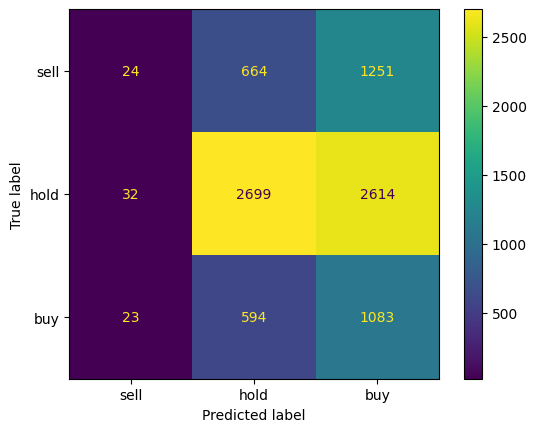

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [68]:
## predict on indiv stocks
## selectKbest only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = selector.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

ABNB: 13.65
SNPS: 21.69
AMAT: 22.89
AVGO: 26.91
CRWD: 20.08
META: 18.07
WDAY: 19.28
AMZN: 20.08
PDD: 29.32
SMCI: 15.66
NVDA: 22.98
MSFT: 16.94
CDNS: 21.77
DDOG: 20.16
MRVL: 20.16
LRCX: 22.18
TTD: 20.16
DASH: 20.97
MELI: 18.95
BKNG: 16.94
CPRT: 18.15
MDB: 20.97
MU: 20.97
ZS: 20.56
INTU: 18.55
PANW: 23.79
MRNA: 23.39
ADBE: 21.77
AMD: 18.95
TSLA: 21.77
TEAM: 16.53
INTC: 18.55
RR.L: 34.97
MKS.L: 28.9
III.L: 36.13


# training mtd 3 - using PCA(0.95)

In [70]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71864, 72) (71864,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [71]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [72]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [73]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [74]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71864, 72) (71864,)
[[    0 14324]
 [    1 42980]
 [    2 14560]]
(128940, 72) (128940,)
[[    0 42980]
 [    1 42980]
 [    2 42980]]


In [75]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 1730]
 [   1 5553]
 [   2 1700]]
(16659, 72) (16659,)
[[   0 5553]
 [   1 5553]
 [   2 5553]]


In [76]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [77]:
from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((128940, 25), (128940,), (16659, 25), (16659,), (8984, 25), (8984,))

In [78]:
X_train[0],y_train[0]

(array([ 4.20046426, -1.32090067, -1.19253584, -1.78082849,  0.31655459,
        -0.06382305,  1.43947887,  0.94508728,  0.21960162, -0.28800458,
        -0.10273753, -0.15499956, -0.11174252, -0.21822095,  0.01310024,
         1.21998456,  1.04916893,  0.48241245,  0.27857667, -0.59324243,
        -0.31082737, -0.42437576,  0.22933031,  0.63555874, -0.12759341]),
 2)

In [79]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [80]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4603518
|████████████████████████████████████████| 1/1 [100%] in 8.5s (0.12/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.46035


accuracy: 45.44


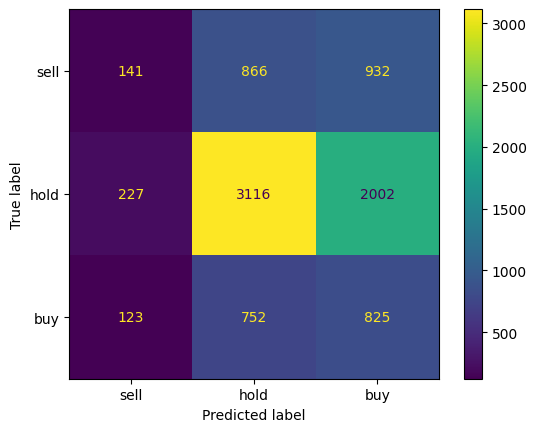

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [82]:
## predict on indiv stocks
## pca transformed features only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

ABNB: 69.08
SNPS: 56.22
AMAT: 47.79
AVGO: 45.78
CRWD: 51.81
META: 58.23
WDAY: 62.65
AMZN: 55.82
PDD: 59.44
SMCI: 59.04
NVDA: 49.6
MSFT: 61.69
CDNS: 54.03
DDOG: 58.06
MRVL: 56.45
LRCX: 54.03
TTD: 52.42
DASH: 52.02
MELI: 62.9
BKNG: 65.32
CPRT: 56.05
MDB: 56.45
MU: 46.77
ZS: 58.06
INTU: 64.92
PANW: 54.84
MRNA: 52.02
ADBE: 56.45
AMD: 54.03
TSLA: 54.44
TEAM: 64.92
INTC: 58.87
RR.L: 62.14
MKS.L: 59.83
III.L: 56.36


# use model to predict on individual stocks

In [264]:
best_model

MLPClassifier(alpha=0.0005, hidden_layer_sizes=32, learning_rate='adaptive',
              max_iter=1000)

In [266]:
for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

META: 77.51
MRVL: 74.3
ABNB: 84.34
TTD: 74.7
AMAT: 71.08
WDAY: 86.35
SNPS: 73.09
AMZN: 74.7
AMD: 69.08
PDD: 77.51
DASH: 71.89
MU: 64.26
MDB: 81.12
CPRT: 75.5
PANW: 75.5
DDOG: 78.31
BKNG: 84.74
AVGO: 62.65
CRWD: 72.29
TEAM: 84.34
CDNS: 73.9
ADBE: 80.32
TSLA: 76.31
ZS: 78.71
SMCI: 78.63
INTC: 75.4
LRCX: 72.98
INTU: 78.63
MSFT: 81.85
NVDA: 67.34
MELI: 80.24
MRNA: 75.81
III.L: 78.3
RR.L: 81.52
MKS.L: 82.11
